In [726]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [727]:
def f(x):
    return 3*x**2 - 4*x + 5

In [728]:
f(3.0)

20.0

In [729]:
xs = np.arange(-5, 5, 0.25)

In [730]:
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [731]:
ys = f(xs)

In [732]:
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

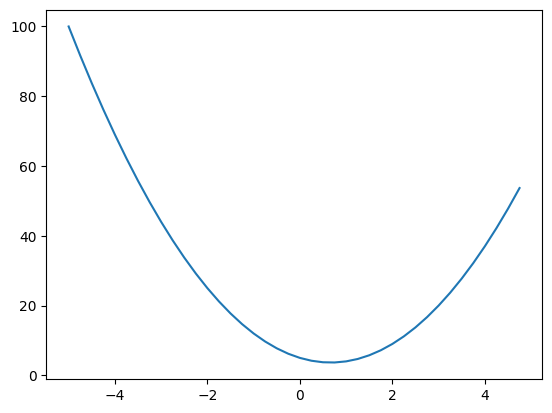

In [733]:
plt.plot(xs, ys)

In [734]:
h = 0.001
x = 2/3
(f(x + h) - f(x))/h

0.0029999999995311555

In [735]:
#####################################################
# from here I am watching a video on youtube, on how to create a neural network

In [736]:
import numpy

In [737]:
inputNodes = 2
outputNodes = 2
hiddenNodes = 3
batchSize = 8

outputData = numpy.random.randn(batchSize, outputNodes)

In [738]:
data = numpy.random.randn(batchSize, inputNodes)

In [739]:
data

array([[ 0.3059252 , -1.40300701],
       [-0.34039461,  0.17925218],
       [-1.2795333 , -0.48036501],
       [ 0.28095931,  1.13730869],
       [-1.44281606,  0.471651  ],
       [-0.58477133, -0.55218753],
       [ 0.45403842,  0.08649683],
       [-1.00756888,  1.90504305]])

In [740]:
weights = numpy.random.randn(inputNodes, hiddenNodes)

In [741]:
weights

array([[-0.40757175,  0.21964703,  0.453414  ],
       [-0.42316574,  0.81306345, -1.25683845]])

In [742]:
hiddenValues = data.dot(weights)

In [743]:
hiddenValues

array([[ 0.46901804, -1.07353816,  1.90206392],
       [ 0.06288185,  0.07097673, -0.37963071],
       [ 0.72477564, -0.67161293,  0.0235829 ],
       [-0.59578115,  0.986416  , -1.3020224 ],
       [ 0.38846452,  0.06657192, -1.24698211],
       [ 0.47200312, -0.57740679,  0.42886701],
       [-0.22165573,  0.1700556 ,  0.09715484],
       [-0.39549235,  1.32761136, -2.85117719]])

In [744]:
# relu - remove all negative values and replace them with zero

hiddenRelu = numpy.maximum(hiddenValues, 0)

In [745]:
hiddenRelu

array([[0.46901804, 0.        , 1.90206392],
       [0.06288185, 0.07097673, 0.        ],
       [0.72477564, 0.        , 0.0235829 ],
       [0.        , 0.986416  , 0.        ],
       [0.38846452, 0.06657192, 0.        ],
       [0.47200312, 0.        , 0.42886701],
       [0.        , 0.1700556 , 0.09715484],
       [0.        , 1.32761136, 0.        ]])

In [746]:
w2 = numpy.random.randn(hiddenNodes, outputNodes)

In [747]:
w2

array([[ 0.13363879, -1.51697133],
       [ 1.19332878,  0.47146484],
       [-0.36062746,  0.18616762]])

In [748]:
outputDataPrediction = hiddenRelu.dot(w2)

In [749]:
outputDataPrediction

array([[-0.62325748, -0.3573842 ],
       [ 0.09310202, -0.06192693],
       [ 0.0883535 , -1.0950735 ],
       [ 1.1771186 ,  0.46506046],
       [ 0.13135612, -0.55790322],
       [-0.09158329, -0.63617405],
       [ 0.16789554,  0.09826232],
       [ 1.58427683,  0.62592208]])

In [750]:
loss = numpy.square(outputDataPrediction - data).sum()

In [751]:
loss

np.float64(17.930913107344452)

In [752]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [753]:
X = numpy.arange(-8, 8, 0.1)
y = numpy.arange(-8, 8, 0.1)

x, y = numpy.meshgrid(X, y)

z = X ** 2 + y ** 2
# y = X ** 2
# z = 4 * X
# slope = 2 * X

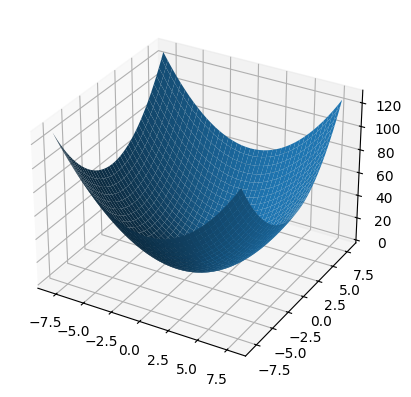

In [754]:
axes = plt.axes(projection='3d')
axes.plot_surface(X, y, z)

In [755]:
# plt.plot(X, y, X, z)
# plt.show()

In [756]:
gradPred = 2 * (outputDataPrediction - outputData)
gradW2 = hiddenRelu.T.dot(gradPred) ## T is the transpose
gradHRelu = gradPred.dot(w2.T)
gradHiddenValues = gradHRelu.copy()
gradHiddenValues[hiddenValues < 0] = 0

In [757]:
inputNodes = numpy.array(inputNodes)
gradWeights = inputNodes.T.dot(gradHiddenValues)

In [758]:
print(weights)
# print(weights.shape, gradWeights.shape)

weights = gradWeights * 1e-4
w2 = w2 - gradW2 * 1e-4
# print(weights)

[[-0.40757175  0.21964703  0.453414  ]
 [-0.42316574  0.81306345 -1.25683845]]


In [759]:
weights

array([[-1.20986443e-04,  0.00000000e+00,  1.22530502e-04],
       [-5.08710664e-04, -8.75120583e-05,  0.00000000e+00],
       [-1.15411140e-04,  0.00000000e+00, -1.30947276e-04],
       [ 0.00000000e+00, -3.01277195e-04,  0.00000000e+00],
       [-1.14327685e-04,  3.46551729e-04,  0.00000000e+00],
       [ 8.95575293e-04,  0.00000000e+00, -8.92084603e-05],
       [ 0.00000000e+00, -8.47405701e-05, -9.90423387e-05],
       [ 0.00000000e+00,  1.53734861e-03,  0.00000000e+00]])

In [760]:
w2

array([[ 0.13353091, -1.51691296],
       [ 1.19261021,  0.47143166],
       [-0.36032586,  0.1862628 ]])

In [761]:
n = 1_000

f = open("my first neural network.txt", "w")
inputNodes = numpy.array(inputNodes)

# lossArray = numpy.array([[]])
# indices = numpy.array([[]])

for i in range(n):
    # print("we are on iteration:", i)
    hiddenValues = inputNodes.dot(weights)
    hiddenRelu = numpy.maximum(hiddenValues, 0)
    outputDataPrediction = hiddenRelu.dot(w2)

    loss = numpy.square(outputDataPrediction - data).sum()
    # lossArray = numpy.append(lossArray, loss)
    # indices = numpy.append(indices, i)
    f.write(str(loss) + "\n")

    gradPred = 2 * (outputDataPrediction - outputData)
    gradW2 = hiddenRelu.T.dot(gradPred) ## T is the transpose
    gradHRelu = gradPred.dot(w2.T)
    gradHiddenValues = gradHRelu.copy()
    gradHiddenValues[hiddenValues < 0] = 0

    gradWeights = inputNodes.T.dot(gradHiddenValues)

    weights = gradWeights * 1e-4
    w2 = w2 - gradW2 * 1e-4
f.close()

# plt.plot(indices, lossArray)
# plt.legend(['Loss over iterations'])
# plt.show()

print(outputData, "\n")
print(outputDataPrediction)

[[ 0.15880417 -0.48787601]
 [ 0.59035569 -0.85648662]
 [-0.96553649 -1.37811671]
 [ 1.26138838  1.84932368]
 [-0.49830779 -0.80178834]
 [ 0.05874948  0.85299616]
 [-0.02920047  1.04648099]
 [-1.15435069 -0.59429299]] 

[[-4.16036682e-06  3.72738239e-05]
 [-1.07283829e-04  5.54584974e-05]
 [ 1.71829908e-03  6.78626274e-04]
 [ 2.51501048e-04 -3.18332937e-03]
 [ 9.27504567e-04  3.66309320e-04]
 [ 1.38077012e-04 -1.56102185e-03]
 [ 1.70855940e-04 -1.93160217e-03]
 [ 1.58087491e-03  6.24351873e-04]]


In [762]:
# def nn(n):
#     # f = open("my first neural network.txt", "w")
#     for i in range(n):
#         print("we are on iteration:", i)
#         hiddenValues = inputNodes.dot(weights)
#         hiddenRelu = numpy.maximum(hiddenValues, 0)
#         outputDataPrediction = hiddenRelu.dot(w2)

#         loss = numpy.square(outputDataPrediction - data).sum()
#         # f.write(str(loss) + "\n")
#         print("loss", loss, "\n")

#         gradPred = 2 * (outputDataPrediction - outputData)
#         gradW2 = hiddenRelu.T.dot(gradPred) ## T is the transpose
#         gradHRelu = gradPred.dot(w2.T)
#         gradHiddenValues = gradHRelu.copy()
#         gradHiddenValues[hiddenValues < 0] = 0

#         inputNodes = numpy.array(inputNodes)
#         gradWeights = inputNodes.T.dot(gradHiddenValues)

#         weights = gradWeights * 1e-4
#         w2 = w2 - gradW2 * 1e-4
#     # f.close()

In [763]:
# times = 70
# nn(times)